# 2. Fit Classifiers

In [1]:
# Load usefull libraries and helper functions
%run libs_and_utils

seed =  42
libraries loaded


In [2]:
# Load data
df_train = pd.read_csv(r'input/creditcard_train.csv')
df_train.sort_values(by=['Time'], inplace=True)
df_test = pd.read_csv(r'input/creditcard_test.csv')
df_test.sort_values(by=['Time'], inplace=True)

X_train = df_train.drop(columns='Class')
y_train = df_train.Class
X_test = df_test.drop(columns='Class')
y_test = df_test.Class
print('data_loaded')

data_loaded


Training DummyClassifier ...


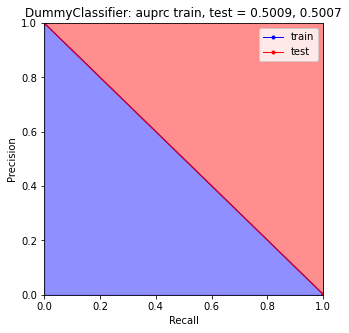

Training LogisticRegression ...


C:\Users\evgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


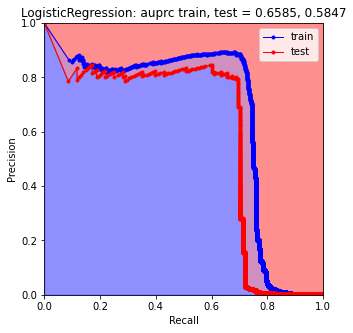

Training KNeighborsClassifier ...


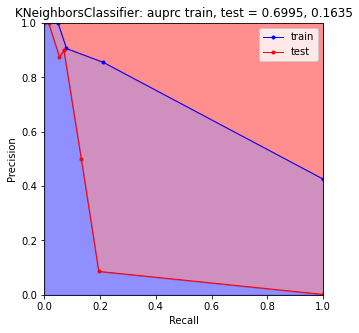

Training MLPClassifier ...


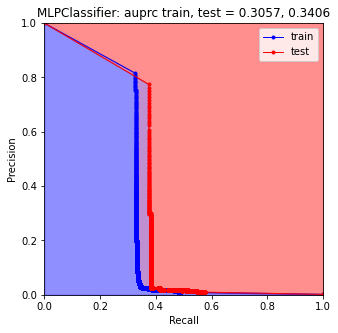

Training RandomForestClassifier ...


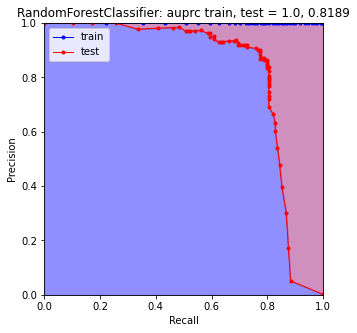

Training ExtraTreesClassifier ...


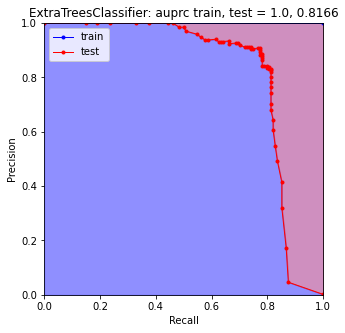

Training AdaBoostClassifier ...


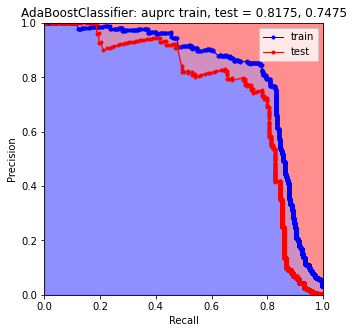

Training GradientBoostingClassifier ...


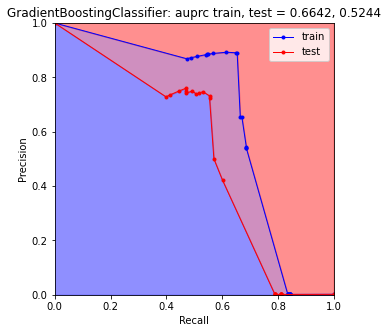

Training LGBMClassifier ...


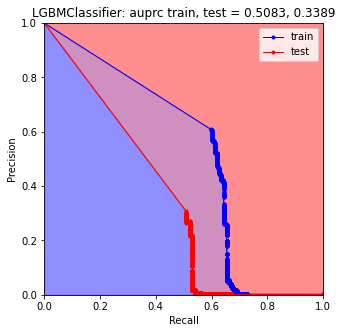

Wall time: 14min 1s


In [3]:
%%time
classifiers = [
    DummyClassifier(strategy='most_frequent', random_state=0),
    LogisticRegression(),                                    
    KNeighborsClassifier(),               
    MLPClassifier(),               
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LGBMClassifier()
              ]

for model in classifiers:
    plot_auprc(model, X_train, y_train, X_test, y_test)

## Fit Classifiers using class_weight = balanced Parameter

Training LogisticRegression ...


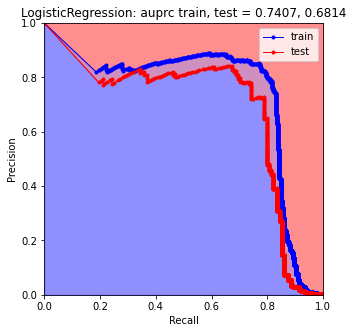

Training RandomForestClassifier ...


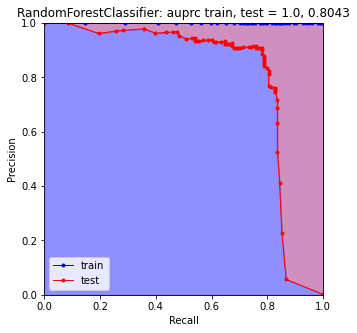

Training ExtraTreesClassifier ...


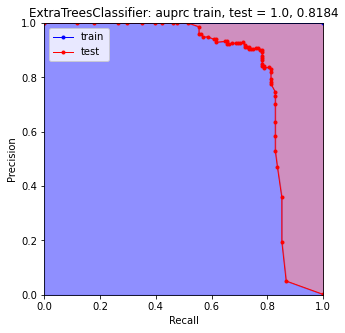

Training LGBMClassifier ...


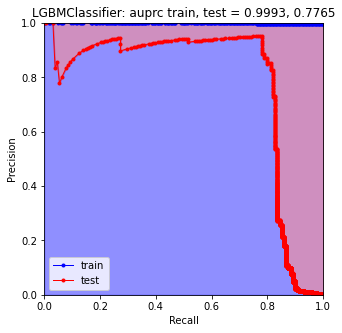

Wall time: 1min 59s


In [4]:
%%time
classifiers = [
    #DummyClassifier(strategy='most_frequent', random_state=0),
    LogisticRegression(class_weight='balanced'),                                         
    #KNeighborsClassifier(class_weight='balanced'), # Does not have class_weight parameter              
    #MLPClassifier(class_weight='balanced'),      # Does not have class_weight parameter         
    RandomForestClassifier(class_weight='balanced'),
    ExtraTreesClassifier(class_weight='balanced'),
    #AdaBoostClassifier(class_weight='balanced'), # Does not have class_weight parameter
    #GradientBoostingClassifier(class_weight='balanced'), # Does not have class_weight parameter
    LGBMClassifier(class_weight='balanced')
              ]

for model in classifiers:
    plot_auprc(model, X_train, y_train, X_test, y_test)

**We clearly see an improvement with the class_weight parameter used for all classifiers**

Best classifiers are:
- ExtraTrees
- RandomForest  
Both perform equally well with and withough class_weight parameter

- LGBMClassifier performs a little worse with default parameters